In [1]:
#Google Drive is mounted
from google.colab import drive
drive.mount('/contentgdrive')

Mounted at /contentgdrive


In [2]:
#A path is created to read image files
path = "/contentgdrive/MyDrive/images/"

In [5]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

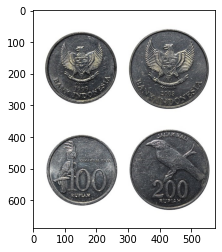

In [6]:
#Images are read in BGR in OpenCV
img_coin1 = cv2.imread(path+'rupiah.jpg',cv2.IMREAD_COLOR)
img_coin1rgb = cv2.cvtColor(img_coin1, cv2.COLOR_BGR2RGB)

plt.imshow(img_coin1rgb)

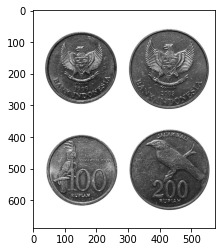

In [7]:
#Convert image to Grayscale 
image = cv2.imread(path+"rupiah.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

## Use Edge Detection to apply filters.

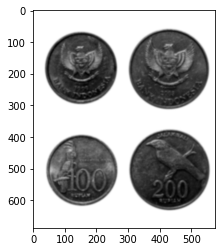

In [9]:
#GaussianBlur is applied 
#Second parameter is the size of the kernel filter
#Third parameter is the standard deviation 
blur = cv2.GaussianBlur(gray, (11,11),0) 
plt.imshow(blur, cmap="gray")

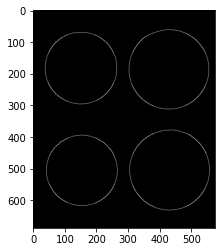

In [10]:
#Use Canny filter to detect the edges
#Second parameters are the lower and upper value for the threshold
#3 represents the kernel size for the sobel filter which will calculating the edge
canny = cv2.Canny(blur, 30, 300, 3)
plt.imshow(canny, cmap='gray')

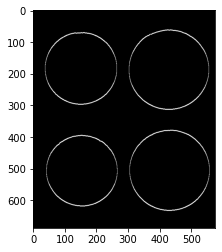

In [11]:
#Using dilation filter to connect the edges and make it thicker
dilated = cv2.dilate(canny, (1,1), iterations=2)
plt.imshow(dilated, cmap='gray')

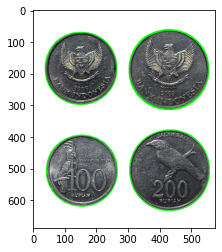

In [14]:
#Calculate the Contours 
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#2 represents the thickness which is the last parameter
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2) 

plt.imshow(rgb)

In [15]:
#Print the amount of coins in the image
print("Coins in the image: ", len(cnt))


Coins in the image:  4
